## Entendiendo las puertas multi-qubit

Dos o más qubits pueden combinar sus estados mediante su **producto tensorial**, o a veces referido como el **producto de Kronecker**. Para mayor conveniencia, aquí se proporciona la representación del vector:

$$
|a\rangle \otimes |b\rangle = |ab\rangle
$$

Para dos qubits, específicamente, $$ |0\rangle = \begin{pmatrix}1 \\ 0\end{pmatrix} $$ y $$ |1\rangle = \begin{pmatrix}0 \\ 1\end{pmatrix} $$, y sus amplitudes complejas $ v_0 $ y $ v_1 $, respectivamente, su producto tensorial se expresa de la siguiente manera:

$$
v_{00}|00\rangle + v_{01}|01\rangle + v_{10}|10\rangle + v_{11}|11\rangle = \begin{pmatrix} v_{00} \\ v_{01} \\ v_{10} \\ v_{11} \end{pmatrix} = |\psi\rangle
$$

El vector que resulta al aplicar el producto tensorial es el estado base de los dos qubits, $ |\psi\rangle $.

En esta sección, discutiremos las puertas multi-qubit y cómo operan sobre los qubits de manera similar a cómo lo hacen las puertas de un solo qubit, lo que incluye ser unitarias y reversibles. En la siguiente ecuación, una puerta multi-qubit, representada por una matriz $ U $, se multiplica por un vector de estado cuántico $ |\psi_0\rangle $ para producir el vector de estado cuántico resultante $ |\psi_2\rangle $:

$$
U|\psi_0\rangle = |\psi_2\rangle
$$

Para mantener las descripciones y los ejemplos uniformes, las siguientes descripciones de las puertas multi-qubit se presentarán de la misma manera que las puertas de un solo qubit. Crearemos una nueva función auxiliar similar a la que utilizamos anteriormente para los circuitos de un solo qubit. 

La función auxiliar tendrá algunas diferencias, la primera de las cuales será el **simulador** que usaremos para ejecutar los circuitos:


In [20]:
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

def execute_circuit(quantum_circuit):
    """
    Ejecuta un circuito cuántico en el simulador QASM, obtiene los resultados,
    dibuja el circuito y genera un histograma de los resultados.

    Args:
        quantum_circuit (QuantumCircuit): El circuito cuántico a ejecutar.

    Returns:
        tuple: Una tupla que contiene:
            - results (dict): Resultados del conteo de las mediciones.
            - circuit_diagram (str): Representación textual del circuito.
            - histogram (matplotlib.figure.Figure): Figura del histograma de los resultados.
    """
    # Crear el simulador QASM
    simulator = Aer.get_backend('qasm_simulator')
    
    # Ejecutar el circuito directamente con el método run
    job = simulator.run(quantum_circuit, shots=1024)
    result = job.result()
    
    # Obtener los resultados de las mediciones
    results = result.get_counts()
    
    # Dibujar el circuito
    circuit_diagram = quantum_circuit.draw(output='mpl')  # Compatibilidad con Qiskit 1.3.0
    
    # Crear un histograma de los resultados
    histogram = plot_histogram(results)
    
    # Retornar los resultados, el diagrama del circuito y el histograma
    return results, circuit_diagram, histogram


Cambiaremos de usar el simulador de vectores de estado al simulador Qasm. **Qasm**, abreviatura de **Quantum Assembly language** (pronunciado como *kazm*), es un lenguaje de programación utilizado para describir las funciones que conforman los circuitos y operaciones cuánticas. Es el lenguaje de programación sobre el cual se construye Qiskit como una biblioteca de Python.

El propósito de cambiar al simulador Qasm no es que no podamos usar el simulador de vectores de estado, sino principalmente para observar algunas de las características interesantes de nuestro circuito y las puertas. Para aquellos que deseen seguir usando el simulador de vectores de estado, no se preocupen. Habrá desafíos en la sección de **Preguntas**, al final de este notebook, que les permitirán utilizarlo.

Otra diferencia que notarás es que ya no utilizaremos el QSphere para visualizar los estados cuánticos. En su lugar, reemplazaremos la salida del QSphere con un histograma que muestra los conteos de los resultados. Para cada circuito que crearemos, incluiremos más de un qubit, ya que estas puertas multi-qubit operan sobre dos o más qubits.

Ahora que tenemos nuestra función auxiliar, ejecutémosla y pasemos al siguiente conjunto de puertas, las **puertas multi-qubit**. Estas incluyen:

- La puerta CNOT
- La puerta Toffoli
- La puerta Swap

Aprenderemos sobre estas puertas en las siguientes secciones.

### Aprendiendo sobre la puerta multi-qubit CNOT

La puerta **CNOT**, a menudo conocida como puerta de Control-NOT, es similar a la puerta XOR de los bits clásicos. La puerta CNOT se compone de dos partes.

La primera parte es el **Control**, que está conectado a uno de los qubits y es lo que desencadena que la puerta CNOT realice una operación en el otro qubit conectado al otro extremo de la puerta CNOT, el **Target**.

El **Target** es una operación que se realizará en el otro qubit; en este caso, es una operación NOT. Recordemos de la sección anterior sobre puertas de un solo qubit que la puerta NOT rota el qubit alrededor del eje **x** por $\pi /2$. La puerta CNOT es una de las puertas multi-qubit más utilizadas, ya que es la forma en que los qubits se entrelazan.

La puerta $CNOT$ también se describe como una puerta de Control-X (CX) ya que el target a menudo se codifica como una operación $X$. Verás esta convención de puerta CX al ejecutar el siguiente ejemplo. La representación matricial de una puerta CNOT es una matriz de 4x4 debido al producto tensorial de dos qubits, como se ilustra aquí:

$$
\text{CNOT} =
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0 \\
\end{bmatrix}
$$

***Nota*** que el cuadrante superior izquierdo de 2x2 de la matriz $CNOT$ representa una matriz de identidad, $I$, y el cuadrante inferior derecho de 2x2 representa la matriz $X$.

La siguiente tabla de verdad ilustra que cuando el qubit de control (el lado izquierdo del vector de entrada) es 0, no hay cambios en el qubit objetivo (el lado derecho del vector de entrada). Cuando el qubit de control está en 1, entonces la operación en el qubit objetivo está habilitada y, por lo tanto, rota el qubit objetivo alrededor del eje **x** por π (es decir, 180°):

<table>
  <tr>
    <th>Entrada</th>
    <th>Salida</th>
  </tr>
  <tr>
    <td>|00⟩</td>
    <td>|00⟩</td>
  </tr>
  <tr>
    <td>|01⟩</td>
    <td>|01⟩</td>
  </tr>
  <tr>
    <td>|10⟩</td>
    <td>|11⟩</td>
  </tr>
  <tr>
    <td>|11⟩</td>
    <td>|10⟩</td>
  </tr>
</table>

Ahora vamos a crear un circuito, agregar una puerta CNOT y ejecutarlo:

1. Comenzaremos creando un circuito cuántico de dos qubits y aplicando una puerta de Hadamard al primer qubit, y una puerta CNOT a los dos qubits, donde el Control se establece en el primer qubit y el Target se establece en el segundo qubit.




Resultados de las mediciones: {'11': 501, '00': 523}

Diagrama del circuito:


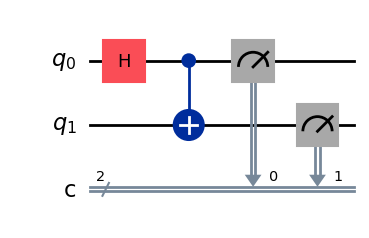

In [21]:
from qiskit import QuantumCircuit

# Crear un circuito cuántico simple
qc = QuantumCircuit(2, 2)
qc.h(0)  # Puerta Hadamard en el qubit 0
qc.cx(0, 1)  # Puerta CNOT con qubit 0 como control y qubit 1 como objetivo
qc.measure([0, 1], [0, 1])  # Medir ambos qubits

# Ejecutar el circuito
results, circuit_diagram, histogram = execute_circuit(qc)

# Mostrar los resultados
print("Resultados de las mediciones:", results)
print("\nDiagrama del circuito:")
circuit_diagram


2. Vamos a examinar el vector de estado 

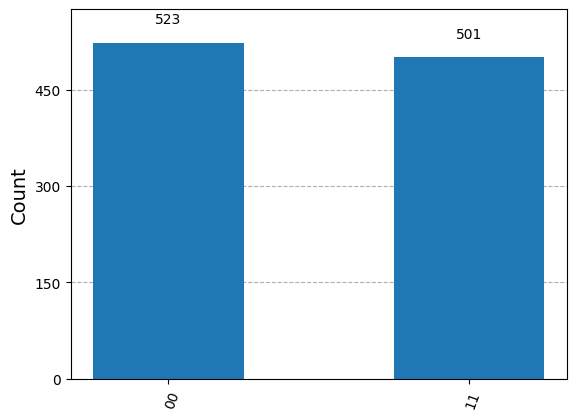

In [22]:
histogram

Los resultados de las puertas anteriores son solo una pequeña muestra, como puedes observar en algunos de los qubits personalizados, como la puerta $ R_x $ o la puerta $CNOT$, que te permiten rotar cualquier estado en la QSphere para cada qubit.

Ahora veamos operadores que no son reversibles, pero que aún son cuánticos. No te preocupes, no estoy contradiciendo mi declaración anterior que requiere que los operadores cuánticos sean unitarios y, por lo tanto, reversibles.
